# 주요역의 월/주단위로 이용객수를 heatmap으로 표시해보기

### 분석대상역 : 해운대/부산역/센텀시티/경성대부경대역/부산대역/대연역

In [1]:
import pandas as pd
#시각화 
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
#prj1에서 저장한 dfg2 엑셀파일 읽어오기
data= pd.read_excel('./data2/부산일자별도시철도이용객수.xlsx') 

In [3]:
data.head()

,Unnamed: 0,년월일,역번호,역명,이용객수
0,0,2018-01-01,100,동매,1972.5
1,1,2018-01-01,101,신평,3783.5
2,2,2018-01-01,102,하단,11380.5
3,3,2018-01-01,103,당리,3385.0
4,4,2018-01-01,104,사하,2593.5


In [4]:
#열삭제 
del data['Unnamed: 0']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39659 entries, 0 to 39658
Data columns (total 4 columns):
년월일     39659 non-null datetime64[ns]
역번호     39659 non-null int64
역명      39659 non-null object
이용객수    39659 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.2+ MB


In [5]:
data.head()

,년월일,역번호,역명,이용객수
0,2018-01-01,100,동매,1972.5
1,2018-01-01,101,신평,3783.5
2,2018-01-01,102,하단,11380.5
3,2018-01-01,103,당리,3385.0
4,2018-01-01,104,사하,2593.5


In [6]:
# 역명확인후 역번호로 리스트 저장 해운대 203 , 부산역 113, 서면 119 , 센텀시티 206 , 경성대부경대 212 , 부산대 128 , 대연 213
data[data['역명']=='해운대']

,년월일,역번호,역명,이용객수
37,2018-01-01,203,해운대,20348.0
149,2018-01-02,203,해운대,12509.5
261,2018-01-03,203,해운대,12401.5
373,2018-01-04,203,해운대,12484.5
485,2018-01-05,203,해운대,13064.0
597,2018-01-06,203,해운대,14322.5
709,2018-01-07,203,해운대,11187.0
821,2018-01-08,203,해운대,10392.5
933,2018-01-09,203,해운대,11819.0
1045,2018-01-10,203,해운대,12131.0


In [7]:
st_lst= [203,113]
st_lst

[203, 113]

### 반복문으로 여러개를 처리해보자

In [8]:
#해운대역 203 정보만 가져오기
df_h = data[data['역번호']== 203]
#해운대의 이용객수만 가져와서 df_h로 재저장
df_h=df_h[['년월일','이용객수']]
#컬럼명을 해운대
df_h.columns = ['년월일','해운대']
df_h=df_h.reset_index()
del df_h['index']
df_h.head()

,년월일,해운대
0,2018-01-01,20348.0
1,2018-01-02,12509.5
2,2018-01-03,12401.5
3,2018-01-04,12484.5
4,2018-01-05,13064.0


In [9]:
#부산역 113 정보만 가져오기
df_b = data[data['역번호']== 113]
df_b=df_b.reset_index()

# 컬럼명을 기존 데이터프레임에서 가져와서 변경하려면 string형태로 가져와야 한다. 
t=df_b.loc[:0,['역명']].max().values[0] 
df_b=df_b[['년월일','이용객수']]
#컬럼명을 부산역으로 변경
df_b.columns = ['년월일',t]
df_b.head()

,년월일,부산역
0,2018-01-01,21680.5
1,2018-01-02,22876.0
2,2018-01-03,21529.5
3,2018-01-04,22007.0
4,2018-01-05,25188.0


In [10]:
#서면역 119 정보만 가져오기
df_s = data[data['역번호']== 119]
df_s = df_s.reset_index()

# 컬럼명을 기존 데이터프레임에서 가져와서 변경하려면 string형태로 가져와야 한다. 
t=df_s.loc[:0,['역명']].max().values[0] 
df_s=df_s[['년월일','이용객수']]
#컬럼명을 부산역으로 변경
df_s.columns = ['년월일',t]
df_s.head()

,년월일,서면
0,2018-01-01,27622.5
1,2018-01-02,44422.5
2,2018-01-03,44253.0
3,2018-01-04,45588.5
4,2018-01-05,49076.5


In [11]:
df_s.tail()

,년월일,서면
207,2018-07-27,47229.0
208,2018-07-28,43029.0
209,2018-07-29,30592.5
210,2018-07-30,43898.0
211,2018-07-31,43901.5


### 역번호를 주면 일자별 데이터프레임 리턴하는 함수를 만들어볼까?

In [12]:
def subway_df(n) :
    df_f = data[data['역번호']== n]    #함수용 데이터프레임을 변수에 해당하는값으로 만든다.
    df_f=df_f.reset_index()
    # 컬럼명을 기존 데이터프레임에서 가져와서 변경하려면 string형태로 가져와야 한다. 
    t=df_f.loc[:0,['역명']].max().values[0] 
    df_f=df_f[['년월일','이용객수']]
    #컬럼명을 부산역으로 변경
    df_f.columns = ['년월일',t]   
    return df_f

In [13]:
subway_df(213)

,년월일,대연
0,2018-01-01,5021.0
1,2018-01-02,9439.0
2,2018-01-03,9830.5
3,2018-01-04,9695.5
4,2018-01-05,9913.0
5,2018-01-06,7916.0
6,2018-01-07,5847.5
7,2018-01-08,9131.5
8,2018-01-09,9657.0
9,2018-01-10,9587.5


In [14]:
# 역명확인후 역번호로 리스트 저장 해운대 203 , 부산역 113, 서면 119 , 센텀시티 206 , 경성대부경대 212 , 부산대 128 , 대연 213
df_1 = subway_df(203) #해운대
df_2 = subway_df(113) #부산역
df_3 = subway_df(119) #서면
df_4 = subway_df(206) #센텀시티
df_5 = subway_df(212) #경성대부경대
df_6 = subway_df(128) #부산대
df_7 = subway_df(213) #대연


In [15]:
len(df_7)

365

In [16]:
#병합
df_m=pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(df_1,df_2),df_4),df_5),df_6),df_7)
len(df_7)

365

In [17]:
##일자별로 보이기엔 데이터가 365개나 되서 많다. 주나 월단위로 해야 할것 같다.

In [18]:
df_m.head()

,년월일,해운대,부산역,센텀시티,경성대부경대,부산대,대연
0,2018-01-01,20348.0,21680.5,9985.0,10019.0,11494.0,5021.0
1,2018-01-02,12509.5,22876.0,21127.0,17853.5,18120.5,9439.0
2,2018-01-03,12401.5,21529.5,20834.5,18431.5,18684.0,9830.5
3,2018-01-04,12484.5,22007.0,20638.0,18457.0,18534.5,9695.5
4,2018-01-05,13064.0,25188.0,22204.5,19315.0,18645.0,9913.0


In [19]:
df_m['월']=df_m['년월일'].dt.month
df_m

,년월일,해운대,부산역,센텀시티,경성대부경대,부산대,대연,월
0,2018-01-01,20348.0,21680.5,9985.0,10019.0,11494.0,5021.0,1
1,2018-01-02,12509.5,22876.0,21127.0,17853.5,18120.5,9439.0,1
2,2018-01-03,12401.5,21529.5,20834.5,18431.5,18684.0,9830.5,1
3,2018-01-04,12484.5,22007.0,20638.0,18457.0,18534.5,9695.5,1
4,2018-01-05,13064.0,25188.0,22204.5,19315.0,18645.0,9913.0,1
5,2018-01-06,14322.5,21539.0,22637.5,15073.5,16550.0,7916.0,1
6,2018-01-07,11187.0,18588.0,16620.5,10564.0,12202.0,5847.5,1
7,2018-01-08,10392.5,20973.0,19155.5,17325.0,16663.0,9131.5,1
8,2018-01-09,11819.0,21086.5,20450.0,18182.0,17572.0,9657.0,1
9,2018-01-10,12131.0,22050.5,20858.5,18137.5,17752.5,9587.5,1


In [20]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 8 columns):
년월일       365 non-null datetime64[ns]
해운대       365 non-null float64
부산역       365 non-null float64
센텀시티      365 non-null float64
경성대부경대    365 non-null float64
부산대       365 non-null float64
대연        365 non-null float64
월         365 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 25.7 KB


### 주는 어떻게 구하지?

In [21]:
df_m.head()

,년월일,해운대,부산역,센텀시티,경성대부경대,부산대,대연,월
0,2018-01-01,20348.0,21680.5,9985.0,10019.0,11494.0,5021.0,1
1,2018-01-02,12509.5,22876.0,21127.0,17853.5,18120.5,9439.0,1
2,2018-01-03,12401.5,21529.5,20834.5,18431.5,18684.0,9830.5,1
3,2018-01-04,12484.5,22007.0,20638.0,18457.0,18534.5,9695.5,1
4,2018-01-05,13064.0,25188.0,22204.5,19315.0,18645.0,9913.0,1


In [22]:
#주 추가 하기
df_m['주'] =df_m['년월일'].apply(lambda x: x.weekofyear)
df_m.head()

,년월일,해운대,부산역,센텀시티,경성대부경대,부산대,대연,월,주
0,2018-01-01,20348.0,21680.5,9985.0,10019.0,11494.0,5021.0,1,1
1,2018-01-02,12509.5,22876.0,21127.0,17853.5,18120.5,9439.0,1,1
2,2018-01-03,12401.5,21529.5,20834.5,18431.5,18684.0,9830.5,1,1
3,2018-01-04,12484.5,22007.0,20638.0,18457.0,18534.5,9695.5,1,1
4,2018-01-05,13064.0,25188.0,22204.5,19315.0,18645.0,9913.0,1,1


In [23]:
df_m.tail()

,년월일,해운대,부산역,센텀시티,경성대부경대,부산대,대연,월,주
360,2018-12-27,14826.5,24541.5,20685.5,19253.0,18822.5,10754.0,12,52
361,2018-12-28,15487.0,27979.5,22076.0,19949.5,18779.0,10674.5,12,52
362,2018-12-29,16206.5,24545.5,20419.0,14492.5,15571.5,8022.5,12,52
363,2018-12-30,14666.0,22141.5,17594.5,10770.5,12564.0,6134.0,12,52
364,2018-12-31,19348.0,27526.0,22104.0,18598.0,19475.0,10314.5,12,1


In [24]:
#요일 반영하기
df_m['요일']= df_m['년월일'].dt.weekday.replace(0,'월').replace(1,'화').replace(2,'수').replace(3,'목').replace(4,'금').replace(5,'토').replace(6,'일')
df_m.head()

,년월일,해운대,부산역,센텀시티,경성대부경대,부산대,대연,월,주,요일
0,2018-01-01,20348.0,21680.5,9985.0,10019.0,11494.0,5021.0,1,1,월
1,2018-01-02,12509.5,22876.0,21127.0,17853.5,18120.5,9439.0,1,1,화
2,2018-01-03,12401.5,21529.5,20834.5,18431.5,18684.0,9830.5,1,1,수
3,2018-01-04,12484.5,22007.0,20638.0,18457.0,18534.5,9695.5,1,1,목
4,2018-01-05,13064.0,25188.0,22204.5,19315.0,18645.0,9913.0,1,1,금


In [25]:
df_m.tail(10)

,년월일,해운대,부산역,센텀시티,경성대부경대,부산대,대연,월,주,요일
355,2018-12-22,19794.0,27959.0,26843.5,17400.0,19040.5,9684.0,12,51,토
356,2018-12-23,15604.0,23870.5,21316.0,12748.5,14206.5,6492.5,12,51,일
357,2018-12-24,19690.0,27420.5,24784.0,21257.5,19838.5,11643.0,12,52,월
358,2018-12-25,20978.0,23287.0,22385.0,15326.5,17661.5,7101.0,12,52,화
359,2018-12-26,15850.0,25333.0,21193.5,19348.5,18710.5,11156.0,12,52,수
360,2018-12-27,14826.5,24541.5,20685.5,19253.0,18822.5,10754.0,12,52,목
361,2018-12-28,15487.0,27979.5,22076.0,19949.5,18779.0,10674.5,12,52,금
362,2018-12-29,16206.5,24545.5,20419.0,14492.5,15571.5,8022.5,12,52,토
363,2018-12-30,14666.0,22141.5,17594.5,10770.5,12564.0,6134.0,12,52,일
364,2018-12-31,19348.0,27526.0,22104.0,18598.0,19475.0,10314.5,12,1,월


## 월, 주, 요일 단위로 group by 해보자

In [26]:
#pd.concat([s1, s2])
#월단위 이용객추이
df_mgm = pd.concat([round(df_m.groupby('월')[['해운대']].mean()),
                    round(df_m.groupby('월')[['부산역']].mean()),
                    round(df_m.groupby('월')[['센텀시티']].mean()),
                    round(df_m.groupby('월')[['경성대부경대']].mean()),
                    round(df_m.groupby('월')[['부산대']].mean()),
                    round(df_m.groupby('월')[['대연']].mean())],axis =1)

df_mgm

,해운대,부산역,센텀시티,경성대부경대,부산대,대연
월,,,,,,
1,12430.0,22103.0,19593.0,16304.0,16542.0,8740.0
2,13194.0,23047.0,19799.0,16490.0,16742.0,8579.0
3,12622.0,22284.0,20189.0,22608.0,20689.0,9673.0
4,12887.0,23156.0,20494.0,21788.0,19716.0,9795.0
5,14542.0,23547.0,20580.0,21954.0,20320.0,9659.0
6,14055.0,22621.0,21268.0,19483.0,17947.0,9470.0
7,15558.0,22254.0,21041.0,17110.0,16639.0,9133.0
8,17285.0,23237.0,20995.0,16264.0,15642.0,8912.0
9,12825.0,21414.0,19531.0,19385.0,18052.0,8998.0


In [27]:
import seaborn as sns

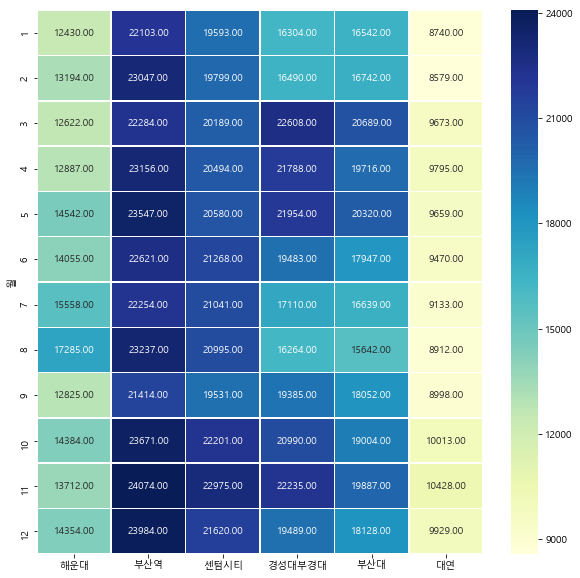

In [28]:
#월단위 시각화
plt.figure(figsize=(10,10))
sns.heatmap(data = df_mgm, annot=True, fmt ='.2f', linewidths=.5, cmap='YlGnBu')

In [29]:
#주단위 이용객추이
#df_hgw = round(df_h.groupby('주')[['해운대']].mean())
#df_hgw
df_mgw = pd.concat([round(df_m.groupby('주')[['해운대']].mean()),
                    round(df_m.groupby('주')[['부산역']].mean()),
                    round(df_m.groupby('주')[['센텀시티']].mean()),
                    round(df_m.groupby('주')[['경성대부경대']].mean()),
                    round(df_m.groupby('주')[['부산대']].mean()),
                    round(df_m.groupby('주')[['대연']].mean())],axis =1)

df_mgw.head()

,해운대,부산역,센텀시티,경성대부경대,부산대,대연
주,,,,,,
1,14458.0,22617.0,19519.0,16039.0,16713.0,8497.0
2,11786.0,21975.0,19481.0,16536.0,16715.0,8618.0
3,12494.0,22966.0,20294.0,16643.0,17291.0,8971.0
4,11919.0,21925.0,19498.0,16034.0,15933.0,8700.0
5,12169.0,21357.0,19917.0,16072.0,16058.0,8969.0


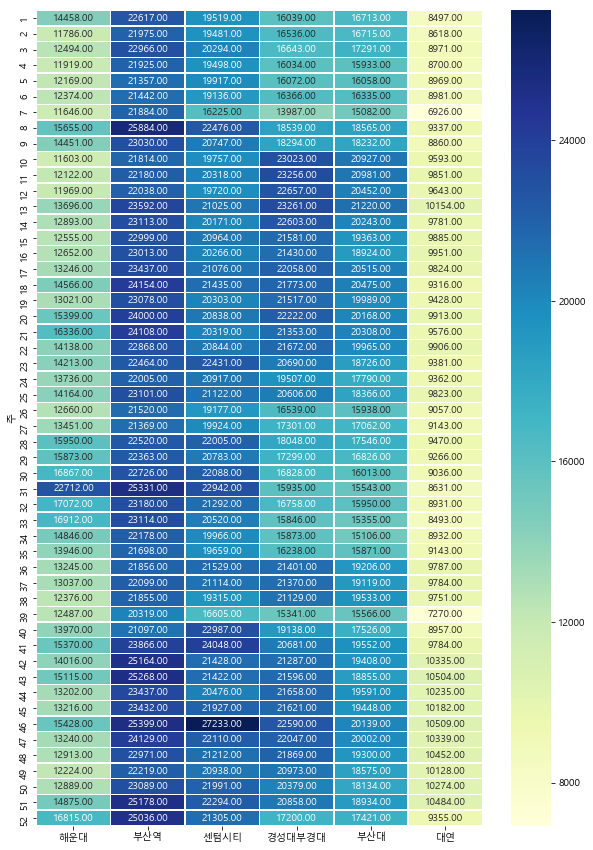

In [30]:
#52주단위 시각화
plt.figure(figsize=(10,15))
sns.heatmap(data = df_mgw, annot=True, fmt ='.2f', linewidths=.5, cmap='YlGnBu')

In [31]:
#요일 단위 이용객추이
df_mgd = pd.concat([round(df_m.groupby('요일')[['해운대']].mean()),
                    round(df_m.groupby('요일')[['부산역']].mean()),
                    round(df_m.groupby('요일')[['센텀시티']].mean()),
                    round(df_m.groupby('요일')[['경성대부경대']].mean()),
                    round(df_m.groupby('요일')[['부산대']].mean()),
                    round(df_m.groupby('요일')[['대연']].mean())],axis =1)

df_mgd

,해운대,부산역,센텀시티,경성대부경대,부산대,대연
요일,,,,,,
금,14843.0,26750.0,22904.0,22347.0,20347.0,10698.0
목,12972.0,22124.0,21200.0,21886.0,19546.0,10288.0
수,13090.0,21592.0,20577.0,21233.0,19198.0,10187.0
월,13064.0,22405.0,19327.0,21065.0,18964.0,10083.0
일,13544.0,21600.0,17625.0,12231.0,13292.0,6261.0
토,17360.0,24504.0,24104.0,16496.0,17356.0,8498.0
화,13149.0,21687.0,20335.0,21350.0,19254.0,10114.0


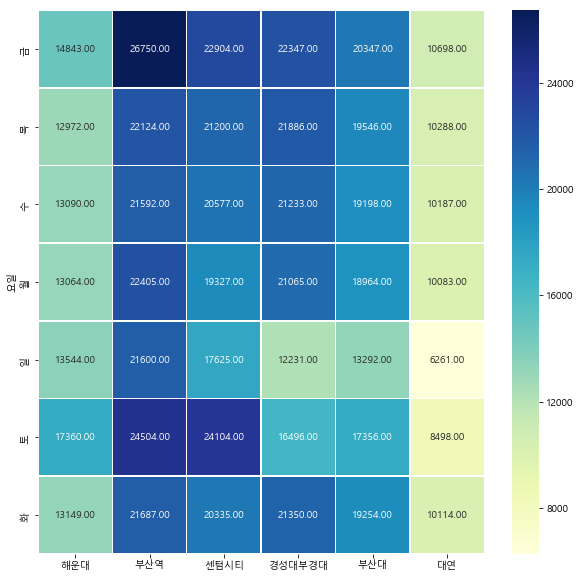

In [32]:
#요일 단위 시각화  : 요일 순서 정렬 필요
plt.figure(figsize=(10,10))
sns.heatmap(data = df_mgd, annot=True, fmt ='.2f', linewidths=.5, cmap='YlGnBu')